### Task 2
# Predictive Analytics
1. For this task, you’ll likely need to use statistical software such as R, SAS, or Python.

1. Using the same transaction dataset, identify the annual salary for each customer

1. Explore correlations between annual salary and various customer attributes (e.g. age). These attributes could be those that are readily available in the data (e.g. age) or those that you construct or derive yourself (e.g. those relating to purchasing behaviour). Visualise any interesting correlations using a scatter plot.

1. Build a simple regression model to predict the annual salary for each customer using the attributes you identified above

1. How accurate is your model? Should ANZ use it to segment customers (for whom it does not have this data) into income brackets for reporting purposes?

1. For a challenge: build a decision-tree based model to predict salary. Does it perform better? How would you accurately test the performance of this model?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Jesus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Jesus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\Jesus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
C:\Users\Jesus\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")
df.head(10)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit
5,posted,NaN,NaN,ACC-1608363396,AUD,151.22 -33.87,PAYMENT,NaN,NaN,Robert,...,20,NaN,NaN,2018-08-01T02:00:00.000+0000,163.00,1005b48a6eda4ffd85e9b649dc9467d3,Australia,CUS-2688605418,NaN,debit
6,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,SALES-POS,3aa18033-a0a9-4190-a117-b7caaf4d07e3,NaN,Kristin,...,43,Kalkallo,VIC,2018-08-01T02:23:04.000+0000,61.06,b79ca208099c4c28aa5dae966096d842,Australia,CUS-4123612273,144.95 -37.53,debit
7,authorized,1.0,NaN,ACC-2776252858,AUD,144.95 -37.76,POS,ee58145d-26e8-4b01-9cd9-62378014f21d,NaN,Kristin,...,43,Melbourne,VIC,2018-08-01T04:11:25.000+0000,15.61,e1c4a50d6a0549cbb3710a62a2fa00d5,Australia,CUS-4123612273,144.96 -37.81,debit
8,authorized,1.0,NaN,ACC-182446574,AUD,116.06 -32.00,POS,cfbf535e-caa8-499f-9d41-bbdc2b836d85,NaN,Tonya,...,27,Yokine,WA,2018-08-01T04:40:00.000+0000,19.25,799e39eb2c1b411185424b0f2cd18bda,Australia,CUS-3026014945,115.85 -31.9,debit
9,posted,NaN,NaN,ACC-602667573,AUD,151.23 -33.96,INTER BANK,NaN,NaN,Michael,...,40,NaN,NaN,2018-08-01T06:00:00.000+0000,21.00,798a77869014441b840a7a8a23408332,Australia,CUS-2031327464,NaN,debit


In [3]:
df.tail(10)

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
12033,authorized,1.0,NaN,ACC-3100725361,AUD,145.73 -17.03,SALES-POS,f17a5cbd-fa5d-47db-8235-c7f449597dd0,NaN,Ronald,...,25,Smithfield,QLD,2018-10-31T22:22:21.000+0000,26.59,593930fd0e1640398b5638f74b7dee14,Australia,CUS-2178051368,145.69 -16.84,debit
12034,authorized,1.0,NaN,ACC-1516130869,AUD,130.84 -12.45,POS,7a3610ce-2f3c-4c7f-becf-987ddeb1c533,NaN,Jessica,...,21,Darwin City,NT,2018-10-31T22:51:45.000+0000,23.48,74b737841b9548b494af32ba71627716,Australia,CUS-325142416,130.84 -12.46,debit
12035,posted,NaN,NaN,ACC-1973887809,AUD,115.78 -31.90,PAYMENT,NaN,NaN,Antonio,...,26,NaN,NaN,2018-10-31T23:00:00.000+0000,29.00,dda53e538c5b4d5aae2481be22e60440,Australia,CUS-1646621553,NaN,debit
12036,posted,NaN,NaN,ACC-1349834573,AUD,145.17 -37.84,PAYMENT,NaN,NaN,Matthew,...,39,NaN,NaN,2018-10-31T23:00:00.000+0000,32.00,df15d6f039554dcbb3ca02631ce22068,Australia,CUS-1790886359,NaN,debit
12037,posted,NaN,NaN,ACC-240804743,AUD,121.48 -30.75,PAYMENT,NaN,NaN,Kenneth,...,29,NaN,NaN,2018-10-31T23:00:00.000+0000,39.00,c7bc398b9eb04e73933dc6d5a7beae0b,Australia,CUS-261674136,NaN,debit
12038,authorized,0.0,NaN,ACC-3021093232,AUD,149.83 -29.47,POS,32aa73dc-b7c2-4161-b14d-6271b96ce792,NaN,Melissa,...,30,Ringwood,VIC,2018-10-31T23:09:06.000+0000,9.79,f2e3e695c2ee4c50a4c8747f852cbe2e,Australia,CUS-55310383,145.23 -37.81,debit
12039,authorized,1.0,NaN,ACC-1608363396,AUD,151.22 -33.87,SALES-POS,296a0500-8552-48ac-ac81-ec37065b568e,NaN,Robert,...,20,Casula,NSW,2018-10-31T23:21:46.000+0000,63.87,56e147e5485f4683b9076fcaaed76640,Australia,CUS-2688605418,150.88 -33.96,debit
12040,authorized,1.0,NaN,ACC-3827517394,AUD,151.12 -33.89,POS,e5975ab4-08f7-4725-a369-24cc0e35ed6e,NaN,Craig,...,28,Kings Park,NSW,2018-10-31T23:34:25.000+0000,43.96,2fdd4681827343f6af2e6519644a684a,Australia,CUS-2663907001,150.92 -33.74,debit
12041,authorized,1.0,NaN,ACC-2920611728,AUD,144.96 -37.76,SALES-POS,af49051a-591d-4b08-bd3c-27730b70ed37,NaN,Tyler,...,69,Oakleigh,VIC,2018-10-31T23:47:05.000+0000,30.77,74aa9cd7e4af4c6d9cd7dbd28e9aedc9,Australia,CUS-1388323263,145.09 -37.91,debit
12042,authorized,1.0,NaN,ACC-1443681913,AUD,150.92 -33.77,SALES-POS,f31f4b14-2040-40ec-a120-b141bb274cbd,NaN,Ryan,...,31,Mascot,NSW,2018-10-31T23:59:44.000+0000,22.36,6d5218e04e8040b9996850ce11a19426,Australia,CUS-3129499595,151.19 -33.93,debit


In [4]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement'],
      dtype='object')

In [5]:
df.shape

(12043, 23)

In [6]:
df['txn_description'].value_counts()

SALES-POS     3934
POS           3783
PAYMENT       2600
PAY/SALARY     883
INTER BANK     742
PHONE BANK     101
Name: txn_description, dtype: int64

In [7]:
df['merchant_state'].value_counts().sum()

7717

In [8]:
df['gender'] = pd.get_dummies(df['gender'], drop_first=True)

In [9]:
df['year'] = [i.year for i in df['date']]
df['month'] = [i.month for i in df['date']]
df['day'] = [i.day_name() for i in df['date']]

In [10]:
from sklearn.preprocessing import LabelEncoder
lbc = LabelEncoder()
df['date'] = lbc.fit_transform(df['date'])

In [11]:
required = df[df['txn_description'] == 'PAY/SALARY'][['customer_id','age','txn_description','balance','date','gender','amount', 'merchant_state']]
required.head(20)

,customer_id,age,txn_description,balance,date,gender,amount,merchant_state
50,CUS-1462656821,23,PAY/SALARY,8342.11,0,1,3903.95,NaN
61,CUS-2500783281,23,PAY/SALARY,2040.58,0,0,1626.48,NaN
64,CUS-326006476,22,PAY/SALARY,3158.51,0,1,983.36,NaN
68,CUS-1433879684,24,PAY/SALARY,2517.66,0,1,1408.08,NaN
70,CUS-4123612273,43,PAY/SALARY,2271.79,0,0,1068.04,NaN
72,CUS-2487424745,26,PAY/SALARY,1017.52,0,0,1013.67,NaN
90,CUS-1196156254,34,PAY/SALARY,16433.32,0,0,3903.73,NaN
92,CUS-1646621553,26,PAY/SALARY,1796.37,0,1,1098.91,NaN
93,CUS-495599312,38,PAY/SALARY,50383.16,0,1,2647.38,NaN
97,CUS-1271030853,30,PAY/SALARY,1244.45,0,0,1158.15,NaN


In [12]:
required.shape

(883, 8)

In [13]:
final_df = required.groupby('customer_id').sum()

In [14]:
final_df.head()

,age,balance,date,gender,amount
customer_id,,,,,
CUS-1005756958,689,61342.65,613,0,12616.11
CUS-1117979751,147,83700.42,323,7,25050.55
CUS-1140341822,168,35050.32,259,6,11499.06
CUS-1147642491,442,114575.08,600,0,22248.07
CUS-1196156254,238,166920.02,289,0,27326.11


In [15]:
final_df = required.groupby('customer_id').mean()

In [16]:
final_df.head()

,age,balance,date,gender,amount
customer_id,,,,,
CUS-1005756958,53.0,4718.665385,47.153846,0,970.47
CUS-1117979751,21.0,11957.202857,46.142857,1,3578.65
CUS-1140341822,28.0,5841.720000,43.166667,1,1916.51
CUS-1147642491,34.0,8813.467692,46.153846,0,1711.39
CUS-1196156254,34.0,23845.717143,41.285714,0,3903.73


In [17]:
final_df

,age,balance,date,gender,amount
customer_id,,,,,
CUS-1005756958,53.0,4718.665385,47.153846,0,970.47
CUS-1117979751,21.0,11957.202857,46.142857,1,3578.65
CUS-1140341822,28.0,5841.720000,43.166667,1,1916.51
CUS-1147642491,34.0,8813.467692,46.153846,0,1711.39
CUS-1196156254,34.0,23845.717143,41.285714,0,3903.73
CUS-1220154422,25.0,9225.907143,43.142857,0,2282.36
CUS-1233833708,44.0,5265.287500,44.500000,1,596.33
CUS-1271030853,30.0,5102.585714,44.714286,0,1158.15
CUS-127297539,20.0,5899.080769,43.153846,0,1138.79


In [18]:
final_df.columns = ['age', 'balance', 'date', 'gender', 'salary']

In [19]:
final_df.columns

Index(['age', 'balance', 'date', 'gender', 'salary'], dtype='object')

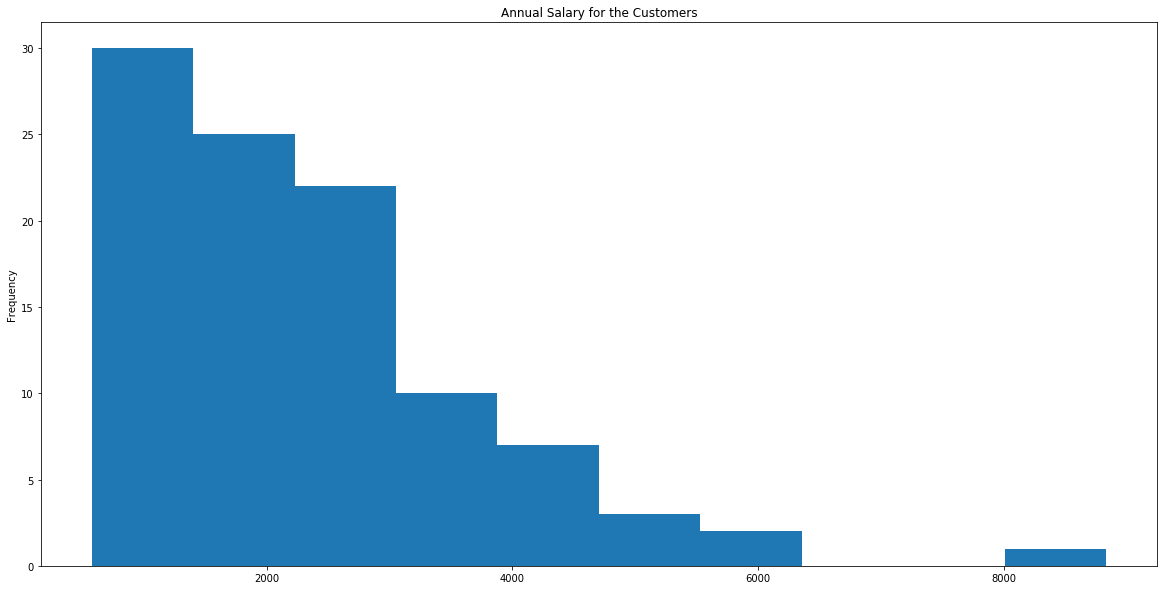

In [20]:
plt.figure(figsize=(20,10))
plt.hist(final_df['salary'])
plt.title('Annual Salary for the Customers')
plt.ylabel('Annual  Income')
plt.ylabel('Frequency')

plt.show()

In [21]:
lbc.classes_

array(['2018-08-01T00:00:00.000000000', '2018-08-02T00:00:00.000000000',
       '2018-08-03T00:00:00.000000000', '2018-08-04T00:00:00.000000000',
       '2018-08-05T00:00:00.000000000', '2018-08-06T00:00:00.000000000',
       '2018-08-07T00:00:00.000000000', '2018-08-08T00:00:00.000000000',
       '2018-08-09T00:00:00.000000000', '2018-08-10T00:00:00.000000000',
       '2018-08-11T00:00:00.000000000', '2018-08-12T00:00:00.000000000',
       '2018-08-13T00:00:00.000000000', '2018-08-14T00:00:00.000000000',
       '2018-08-15T00:00:00.000000000', '2018-08-17T00:00:00.000000000',
       '2018-08-18T00:00:00.000000000', '2018-08-19T00:00:00.000000000',
       '2018-08-20T00:00:00.000000000', '2018-08-21T00:00:00.000000000',
       '2018-08-22T00:00:00.000000000', '2018-08-23T00:00:00.000000000',
       '2018-08-24T00:00:00.000000000', '2018-08-25T00:00:00.000000000',
       '2018-08-26T00:00:00.000000000', '2018-08-27T00:00:00.000000000',
       '2018-08-28T00:00:00.000000000', '2018-08-29

In [22]:
final_df.reset_index(inplace=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x205f6f924e0>,
 'caps': [<matplotlib.lines.Line2D at 0x205f6f92b70>,
 'boxes': [<matplotlib.lines.Line2D at 0x205f6f920f0>],
 'medians': [<matplotlib.lines.Line2D at 0x205f6f92f98>],
 'fliers': [<matplotlib.lines.Line2D at 0x205f6f8c588>],
 'means': []}

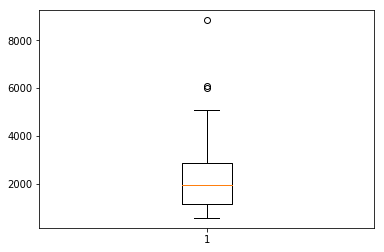

In [23]:
plt.boxplot(final_df['salary'])

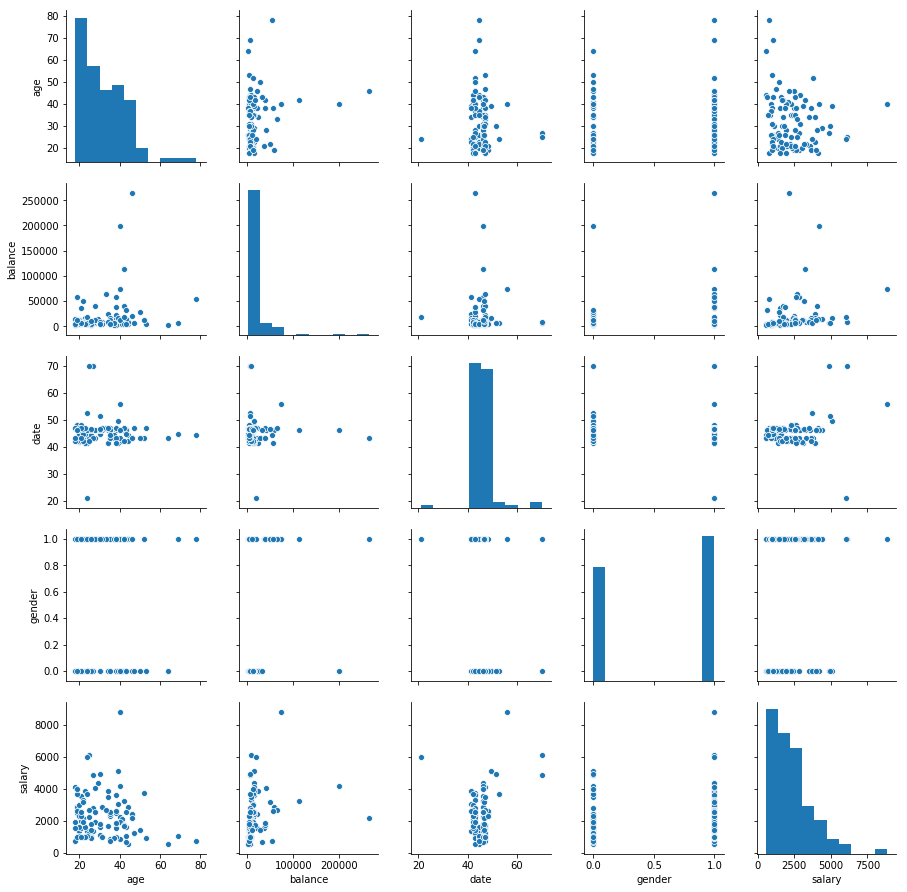

In [24]:
sns.pairplot(final_df[final_df.columns[1:]])

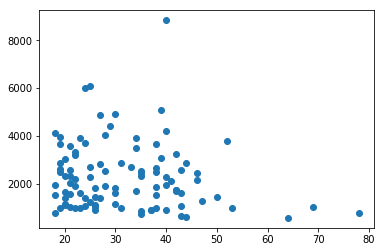

In [25]:
plt.scatter(final_df['age'],final_df['salary'])

In [26]:
final_df[final_df.columns[1:]]

,age,balance,date,gender,salary
0,53.0,4718.665385,47.153846,0,970.47
1,21.0,11957.202857,46.142857,1,3578.65
2,28.0,5841.720000,43.166667,1,1916.51
3,34.0,8813.467692,46.153846,0,1711.39
4,34.0,23845.717143,41.285714,0,3903.73
5,25.0,9225.907143,43.142857,0,2282.36
6,44.0,5265.287500,44.500000,1,596.33
7,30.0,5102.585714,44.714286,0,1158.15
8,20.0,5899.080769,43.153846,0,1138.79
9,21.0,6923.155714,43.142857,0,2023.68


In [27]:
final_df.columns[1:].to_list()

['age', 'balance', 'date', 'gender', 'salary']

In [28]:
df.iloc[1]

status                                         authorized
card_present_flag                                       0
bpay_biller_code                                      NaN
account                                    ACC-1598451071
currency                                              AUD
long_lat                                    153.41 -27.95
txn_description                                 SALES-POS
merchant_id          830a451c-316e-4a6a-bf25-e37caedca49e
merchant_code                                         NaN
first_name                                          Diana
balance                                              21.2
date                                                    0
gender                                                  0
age                                                    26
merchant_suburb                                    Sydney
merchant_state                                        NSW
extraction                   2018-08-01T01:13:45.000+0000
amount        

In [29]:
final_df.columns

Index(['customer_id', 'age', 'balance', 'date', 'gender', 'salary'], dtype='object')

In [30]:
X = final_df['age'].values.reshape((-1,1))
Y = final_df['salary'].values.reshape((-1,1))

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()

lr.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [32]:
y_pred = lr.predict(X)

In [33]:
lr.score(Y,y_pred)

-53594.414547818626

In [34]:
mean_squared_error(Y,y_pred)

1898872.1604256718

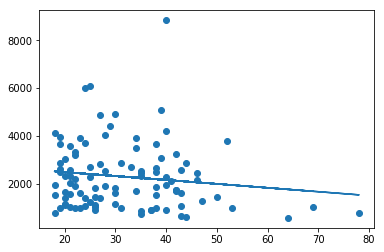

In [35]:
plt.scatter(X,Y)
plt.plot(X,y_pred)

In [36]:
df.groupby(['customer_id','day','month','year']).mean()

card_present_flag  merchant_code  \
customer_id    day       month year                                     
CUS-1005756958 Friday    8     2018           0.833333            NaN   
                         9     2018                NaN            NaN   
               Monday    8     2018           1.000000            NaN   
                         9     2018           0.000000            NaN   
               Saturday  8     2018           0.909091            NaN   
               Sunday    8     2018           1.000000            NaN   
                         10    2018                NaN            NaN   
               Thursday  8     2018           0.750000            NaN   
                         9     2018           1.000000            NaN   
                         10    2018                NaN            NaN   
               Tuesday   8     2018           0.833333            0.0   
                         9     2018           0.500000            0.0   
                         10    2018                NaN            0.0   
               Wednesday 8     2018           0.600000            NaN   
                         9     2018           0.500000            NaN   
CUS-1117979751 Friday    8     2018           0.500000            NaN   
                         9     2018           1.000000            NaN   
                         10    2018           0.666667            NaN   
               Monday    8     2018           1.000000            0.0   
                         9     2018                NaN            0.0   
                         10    2018           1.000000            0.0   
               Saturday  8     2018           0.833333            NaN   
                         9     2018           0.800000            NaN   
                         10    2018           1.000000            NaN   
               Sunday    8     2018           0.875000            NaN   
                         9     2018           1.000000            NaN   
                         10    2018           0.857143            NaN   
               Thursday  8     2018           0.750000            NaN   
                         9     2018           1.000000            NaN   
                         10    2018           1.000000            NaN   
...                                                ...            ...   
CUS-880898248  Thursday  8     2018           1.000000            0.0   
                         9     2018           1.000000            0.0   
                         10    2018           0.666667            0.0   
               Tuesday   8     2018           1.000000            NaN   
                         9     2018           1.000000            NaN   
                         10    2018           1.000000            NaN   
               Wednesday 8     2018           0.400000            NaN   
                         9     2018           1.000000            NaN   
                         10    2018           1.000000            NaN   
CUS-883482547  Friday    8     2018                NaN            NaN   
                         9     2018           0.875000            NaN   
                         10    2018           0.777778            NaN   
               Monday    8     2018           0.571429            0.0   
                         9     2018           0.777778            0.0   
                         10    2018           0.428571            0.0   
               Saturday  8     2018           0.000000            NaN   
                         9     2018           1.000000            NaN   
                         10    2018           0.666667            NaN   
               Sunday    8     2018           0.812500            NaN   
                         9     2018           1.000000            NaN   
                         10    2018           0.666667            NaN   
               Thursday  8     2018           1.000000            NaN   
                      

In [37]:
df.columns

Index(['status', 'card_present_flag', 'bpay_biller_code', 'account',
       'currency', 'long_lat', 'txn_description', 'merchant_id',
       'merchant_code', 'first_name', 'balance', 'date', 'gender', 'age',
       'merchant_suburb', 'merchant_state', 'extraction', 'amount',
       'transaction_id', 'country', 'customer_id', 'merchant_long_lat',
       'movement', 'year', 'month', 'day'],
      dtype='object')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12043 entries, 0 to 12042
Data columns (total 26 columns):
status               12043 non-null object
card_present_flag    7717 non-null float64
bpay_biller_code     885 non-null object
account              12043 non-null object
currency             12043 non-null object
long_lat             12043 non-null object
txn_description      12043 non-null object
merchant_id          7717 non-null object
merchant_code        883 non-null float64
first_name           12043 non-null object
balance              12043 non-null float64
date                 12043 non-null int64
gender               12043 non-null uint8
age                  12043 non-null int64
merchant_suburb      7717 non-null object
merchant_state       7717 non-null object
extraction           12043 non-null object
amount               12043 non-null float64
transaction_id       12043 non-null object
country              12043 non-null object
customer_id          12043 non-null ob

## Decision Tree Regressor Algorithon

In [41]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()

dt_reg.fit(X,Y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [42]:
y_pred = dt_reg.predict(X)

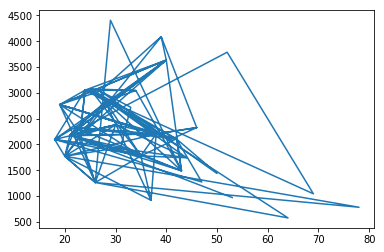

In [43]:
plt.plot(X,y_pred)

In [55]:
df.groupby('customer_id').mean()

,card_present_flag,merchant_code,balance,date,gender,age,amount,year,month
customer_id,,,,,,,,,
CUS-1005756958,0.812500,0.0,2275.852055,26.904110,0,53.0,222.862603,2018.0,8.438356
CUS-1117979751,0.826923,0.0,9829.929000,43.060000,1,21.0,339.843700,2018.0,8.890000
CUS-1140341822,0.815385,0.0,5699.212250,56.637500,1,28.0,212.632500,2018.0,9.350000
CUS-1147642491,0.750000,0.0,9032.841186,51.957627,0,34.0,245.600169,2018.0,9.177966
CUS-1196156254,0.785276,0.0,22272.433755,42.779592,0,34.0,147.145796,2018.0,8.930612
CUS-1220154422,0.750000,0.0,8475.796000,46.853333,0,25.0,274.614800,2018.0,9.106667
CUS-1233833708,0.760000,0.0,4923.853636,42.113636,1,44.0,236.035000,2018.0,9.045455
CUS-1271030853,0.861538,0.0,5003.940513,46.393162,0,30.0,248.545128,2018.0,9.034188
CUS-127297539,0.824675,0.0,5448.334573,43.175879,0,20.0,109.833216,2018.0,8.914573
